<a href="https://colab.research.google.com/github/bmontoyag/UTEC_IA_Fundamentals/blob/main/1_hill_climbing_teacher_v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Hill climbing search

![](https://drive.google.com/uc?export=view&id=1IlgFVvt98JrqeC7A1eracheX7oUHBx0E)

In [ ]:
import numpy as np

TSP = [
    [0,   200,  600,  100],
    [200,   0,  300,  100],
    [600, 300,  0,    400],
    [100, 100,  400,  0],
]

# Step 1
current_solution = np.array([0, 1, 2, 3])
np.random.shuffle(current_solution)

print(current_solution)

[3 0 2 1]


In [ ]:
def fitness(sol):
  distance = 0
  for i in range( len(sol) - 1 ):
    distance = distance + TSP[ sol[i]  ][ sol[i+1]  ]

  return distance

print( fitness(current_solution) )

1000


In [ ]:
def get_neighbors(sol):
  neighbors = []
  for i in range(len(sol) - 1):
    for j in range( i + 1, len(sol) ):
      new_sol = sol.copy()
      new_sol[i], new_sol[j] = new_sol[j], new_sol[i]
      neighbors.append(new_sol)
  return neighbors

print( (current_solution) )
print( get_neighbors(current_solution) )

[3 0 2 1]
[array([0, 3, 2, 1]), array([2, 0, 3, 1]), array([1, 0, 2, 3]), array([3, 2, 0, 1]), array([3, 1, 2, 0]), array([3, 0, 1, 2])]


In [ ]:
def hill_climbing():
  # step 1: Solucion inicial
  current_solution = np.array([0, 1, 2, 3])
  np.random.shuffle(current_solution)

  while True:
    print("Iteration...")
    # step: generar vecinos
    neighbors = get_neighbors(current_solution)
    best_neighbor = min(neighbors, key=fitness)

    print("current_solution", current_solution)
    print("fitness current_solution", fitness(current_solution))
    print("neighbors", neighbors)
    print("best_neighbor", best_neighbor)
    print("fitness best_neighbor", fitness(best_neighbor))

    if fitness(best_neighbor) < fitness(current_solution):
      current_solution = best_neighbor
    else:
      return current_solution

    print("")

solution = hill_climbing()

print("\n 'good' solution:", solution)




Iteration...
current_solution [1 3 0 2]
fitness current_solution 800
neighbors [array([3, 1, 0, 2]), array([0, 3, 1, 2]), array([2, 3, 0, 1]), array([1, 0, 3, 2]), array([1, 2, 0, 3]), array([1, 3, 2, 0])]
best_neighbor [0 3 1 2]
fitness best_neighbor 500

Iteration...
current_solution [0 3 1 2]
fitness current_solution 500
neighbors [array([3, 0, 1, 2]), array([1, 3, 0, 2]), array([2, 3, 1, 0]), array([0, 1, 3, 2]), array([0, 2, 1, 3]), array([0, 3, 2, 1])]
best_neighbor [3 0 1 2]
fitness best_neighbor 600

 'good' solution: [0 3 1 2]


2

# HC con plot

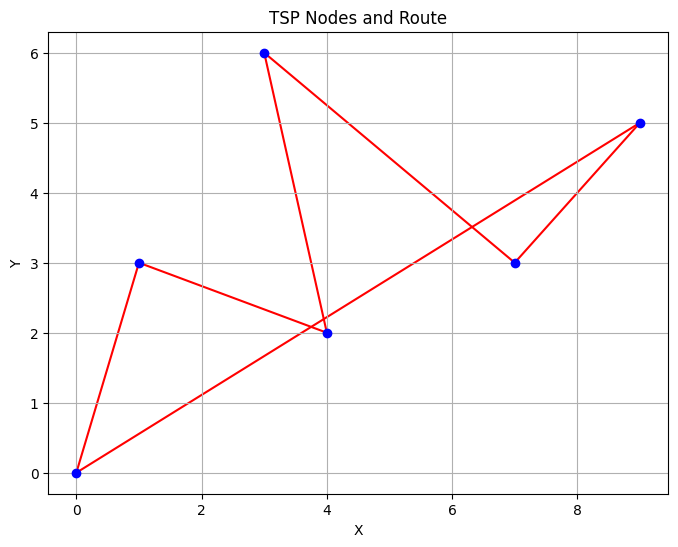

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform

def plot_tsp(nodes, route):
    """
    Plot the TSP nodes and route.

    Parameters:
    - nodes: List of tuples containing the coordinates of each node.
    - route: List of node indices representing the TSP route.
    """
    x = [node[0] for node in nodes]
    y = [node[1] for node in nodes]

    plt.figure(figsize=(8, 6))
    plt.scatter(x, y, color='blue', zorder=2)  # Plot nodes


    for i in range(len(route) - 1):
        node1 = route[i]
        node2 = route[i + 1]
        plt.plot([nodes[node1][0], nodes[node2][0]], [nodes[node1][1], nodes[node2][1]], color='red', zorder=1)  # Plot route

    # Connect the last node to the first node to form a loop
    node1 = route[-1]
    node2 = route[0]
    plt.plot([nodes[node1][0], nodes[node2][0]], [nodes[node1][1], nodes[node2][1]], color='red', zorder=1)  # Plot route

    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('TSP Nodes and Route')
    plt.grid(True)
    plt.show()

# Example usage:
nodes = [(0, 0), (1, 3), (4, 2), (3, 6), (7, 3), (9, 5)]  # Coordinates of nodes
route = [0, 1, 2, 3, 4, 5]  # Example TSP route (indices of nodes)

plot_tsp(nodes, route)

In [ ]:
N = 20 # cantidad de ciudades
positions = np.random.rand(N, 2) # generar las ciudades
distances = squareform(pdist(positions, 'euclidean')) # distancias entre ciudades

In [ ]:
def fitness(sol):
  distance = 0
  for i in range( len(sol) - 1 ):
    distance = distance + distances[ sol[i]  ][ sol[i+1]  ]

  return distance

print( fitness(current_solution) )

def get_neighbors(sol):
  neighbors = []
  for i in range(len(sol) - 1):
    for j in range( i + 1, len(sol) ):
      new_sol = sol.copy()
      new_sol[i], new_sol[j] = new_sol[j], new_sol[i]
      neighbors.append(new_sol)
  return neighbors

NameError: name 'current_solution' is not defined

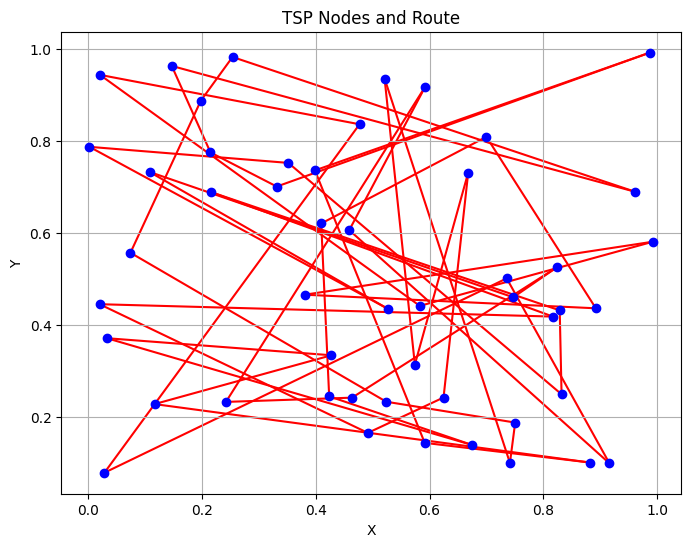

Iteration...
fitness current_solution 24.853728454800876
fitness best_neighbor 22.978035821097006

Iteration...
fitness current_solution 22.978035821097006
fitness best_neighbor 21.45433412295069

Iteration...
fitness current_solution 21.45433412295069
fitness best_neighbor 20.164615336862767

Iteration...
fitness current_solution 20.164615336862767
fitness best_neighbor 18.90512436884896

Iteration...
fitness current_solution 18.90512436884896
fitness best_neighbor 17.774728823723397

Iteration...
fitness current_solution 17.774728823723397
fitness best_neighbor 16.945958052444375

Iteration...
fitness current_solution 16.945958052444375
fitness best_neighbor 16.120325646852088

Iteration...
fitness current_solution 16.120325646852088
fitness best_neighbor 15.330397039972636

Iteration...
fitness current_solution 15.330397039972636
fitness best_neighbor 14.65029930539068

Iteration...
fitness current_solution 14.65029930539068
fitness best_neighbor 13.981697333556566

Iteration...
fit

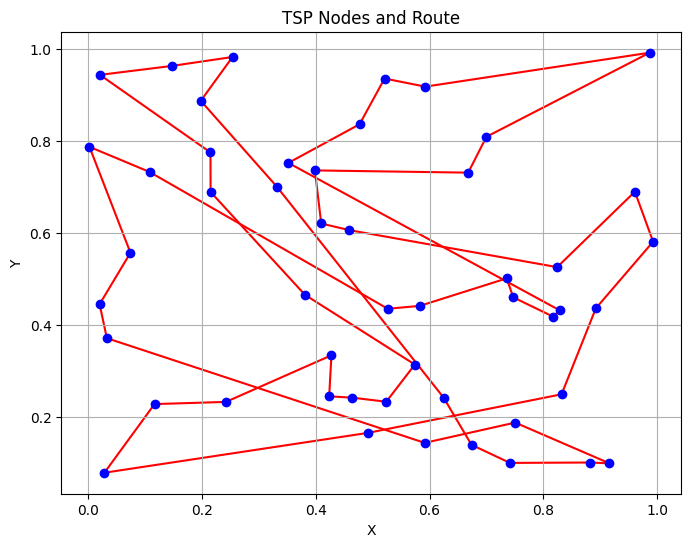


 'good' solution: [31 17 44  3 24 23 16 25 43  2 46 36 18 34 49 38 45 20 26 48  8 40 29 10
 13 32  0 47 12 42 33 14 39  9 28 35  7 15 30 41 21  5 27 37  6 11  1 19
 22  4]


In [ ]:
def hill_climbing():
  # step 1: Solucion inicial
  current_solution = np.array(range(N))
  np.random.shuffle(current_solution)

  plot_tsp(positions, current_solution)

  while True:
    print("Iteration...")
    # step: generar vecinos
    neighbors = get_neighbors(current_solution)
    best_neighbor = min(neighbors, key=fitness)

    #print("current_solution", current_solution)
    print("fitness current_solution", fitness(current_solution))
    #print("neighbors", neighbors)
    #print("best_neighbor", best_neighbor)
    print("fitness best_neighbor", fitness(best_neighbor))

    if fitness(best_neighbor) < fitness(current_solution):
      current_solution = best_neighbor
    else:
      return current_solution

    print("")

solution = hill_climbing()
plot_tsp(positions, solution)

print("\n 'good' solution:", solution)




In [ ]:
import numpy as np
from scipy.spatial.distance import pdist, squareform

N = 20 # cantidad de ciudades
positions = np.random.rand(N, 2) # generar las ciudades
distances = squareform(pdist(positions, 'euclidean')) # distancias entre ciudades
print (positions)
print (distances)



[[0.66282091 0.57740731]
 [0.23676406 0.78668192]
 [0.28569628 0.01370346]
 [0.42716498 0.83312712]
 [0.16946378 0.8056613 ]
 [0.99502379 0.0787256 ]
 [0.43522018 0.78691372]
 [0.80565674 0.59297384]
 [0.76527109 0.1853935 ]
 [0.21014008 0.23177739]
 [0.33217784 0.61177378]
 [0.29624502 0.26328299]
 [0.33441008 0.54053779]
 [0.10997528 0.18988563]
 [0.46290813 0.37978396]
 [0.73911213 0.5551624 ]
 [0.32056847 0.24636564]
 [0.51554384 0.27837202]
 [0.24084846 0.80801728]
 [0.45520006 0.94423906]]
[[0.         0.47467916 0.67822196 0.34774465 0.54360017 0.5992013
  0.30934613 0.14368156 0.40518004 0.56954367 0.33242427 0.48275457
  0.33047396 0.67513802 0.28110516 0.07946815 0.47615683 0.33333564
  0.48087598 0.4215115 ]
 [0.47467916 0.         0.77452571 0.19598384 0.06992528 1.03738131
  0.19845626 0.6009673  0.80054197 0.55554287 0.19924018 0.52676791
  0.26480499 0.61011573 0.46551809 0.55313188 0.5467768  0.57973884
  0.0217228  0.26932979]
 [0.67822196 0.77452571 0.         0.83154

In [ ]:
def fitness(sol):
  distance = 0
  for i in range( len(sol) - 1 ):
    distance = distance + distances[ sol[i]  ][ sol[i+1]  ]

  return distance

def randoom_neighbor(sol):
  i,j = np.random.choice(len(sol),2 , replace=False)
  new_sol= sol.copy()
  new_sol[i], new_sol[j] = new_sol[j], new_sol[i]
  return new_sol

In [ ]:
def accept (delta , T):
  if delta > 0:
    return  True
  else:
    r = np.random.rand()
    if r < np.exp(-delta/T):
      #print( "T", T, "\t", "exp:", np.exp(-delta/T))
      return True
    else:
      return False

def simulated_anneling(T_max, T_min, coooling_rate):
  initial_solution = np.array(list(range(N)))
  np.random.shuffle(initial_solution)
  T = T_max
  x = initial_solution
  E = fitness(initial_solution)

  plot_tsp(positions, initial_solution)
  #print("T_max:", T_max)
  #print("initial_solution:", initial_solution)
  #print("E:", E)

  while T > T_min :
    x_new = randoom_neighbor(x)
    E_new = fitness(x_new)
    delta = E_new - E

    if accept (delta, T):
      x = x_new
      E = E_new

    T = T * cooling_rate

  return x


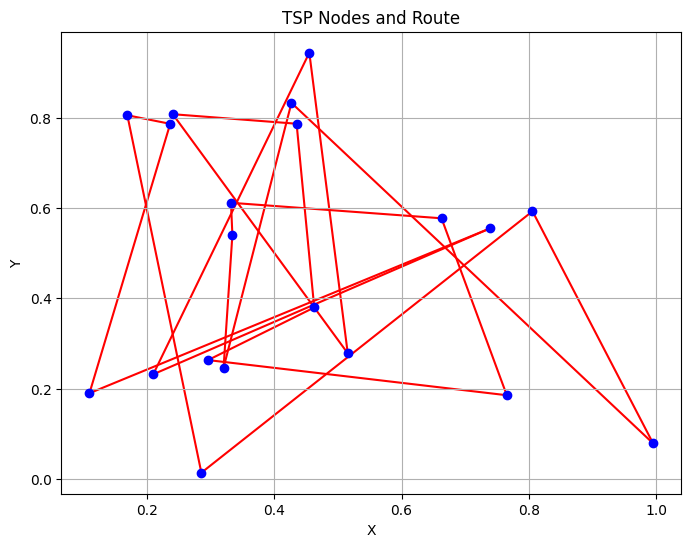

<ipython-input-23-86cd7b8de9ef>:6: RuntimeWarning: overflow encountered in exp
  if r < np.exp(-delta/T):


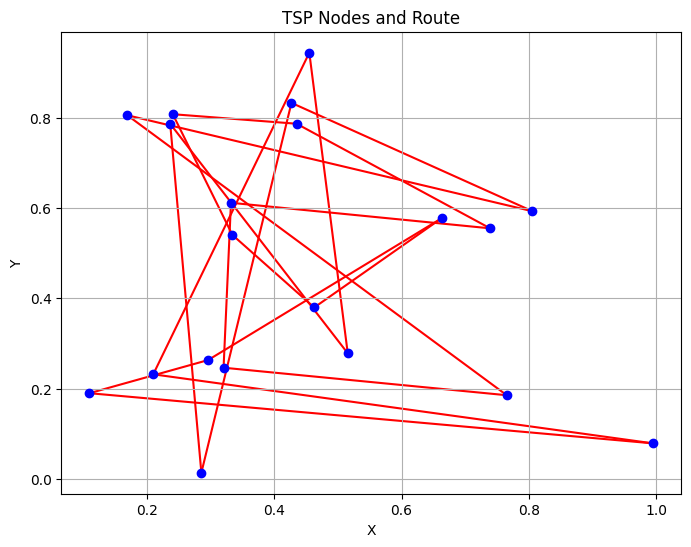

In [ ]:
T_max = 1000
T_min = 0.000001
cooling_rate = 0.9999
x_test = simulated_anneling(T_max, T_min, cooling_rate)

plot_tsp(positions, x_test)